In [1]:
#!pip install --upgrade pip

In [2]:
#!pip install --upgrade tensorflow

In [3]:
#!pip install --upgrade keras

In [4]:
import pandas as pd 
from keras.models import Sequential
from keras.layers import Dense

In [5]:
df = pd.read_csv("pima-indians-diabetes.csv")

In [6]:
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [77]:
df = pd.read_csv("pima-indians-diabetes.csv",header=None)

In [78]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [79]:
df.columns = ["preg","plas","pres","skin","test","mass","pedi","age","class"]

In [80]:
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [81]:
x = df.iloc[:,0:8]
# x = df.drop("class",axis=1)

In [82]:
y = df.iloc[:,8]
# y = df["class"]

In [83]:
x.shape

(768, 8)

In [84]:
model = Sequential()
model.add(Dense(8, activation = "relu"))
model.add(Dense(12,activation = "relu"))
model.add(Dense(1,activation = "sigmoid")) # classification için "sigmoid", otherwise "relu" ("softmax" hangisi için hatırlamıyorum ona bak !!!)

In [85]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
# loss => İkili classification için "binary_crossentropy", yoksa "crossentropy"
# accuracy => regression için "mse", classification için "accuracy"

In [86]:
model.fit(x,y, epochs = 150, batch_size = 10, verbose = 1)

Epoch 1/150
77/77 [==============================] - 0s 1ms/step - loss: 2.7533 - accuracy: 0.5599
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 0.9472 - accuracy: 0.6393
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7060 - accuracy: 0.6576
Epoch 4/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6647 - accuracy: 0.6693
Epoch 5/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6394 - accuracy: 0.6966
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6324 - accuracy: 0.7018
Epoch 7/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6561 - accuracy: 0.6823
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6294 - accuracy: 0.6927
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6199 - accuracy: 0.6953
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.6901
Epoch 11/

77/77 [==============================] - 0s 1ms/step - loss: 0.5191 - accuracy: 0.7526
Epoch 84/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5128 - accuracy: 0.7565
Epoch 85/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5174 - accuracy: 0.7435
Epoch 86/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5123 - accuracy: 0.7630
Epoch 87/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5253 - accuracy: 0.7513
Epoch 88/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5204 - accuracy: 0.7643
Epoch 89/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5395 - accuracy: 0.7292
Epoch 90/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5150 - accuracy: 0.7370
Epoch 91/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5193 - accuracy: 0.7461
Epoch 92/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5106 - accuracy: 0.7435
Epoch 93/150


In [90]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 8)                 72        
                                                                 
 dense_19 (Dense)            (None, 12)                108       
                                                                 
 dense_20 (Dense)            (None, 1)                 13        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [91]:
scores = model.evaluate(x,y)

24/24 [==============================] - 0s 1ms/step - loss: 0.4918 - accuracy: 0.7643


In [92]:
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

accuracy: 76.43%


In [93]:
history = model.fit(x,y, validation_split=0.2, epochs=200,batch_size=10, verbose=2)

Epoch 1/200
62/62 - 0s - loss: 0.4769 - accuracy: 0.7671 - val_loss: 0.5440 - val_accuracy: 0.7338 - 190ms/epoch - 3ms/step
Epoch 2/200
62/62 - 0s - loss: 0.4819 - accuracy: 0.7671 - val_loss: 0.5543 - val_accuracy: 0.7273 - 105ms/epoch - 2ms/step
Epoch 3/200
62/62 - 0s - loss: 0.4754 - accuracy: 0.7687 - val_loss: 0.4856 - val_accuracy: 0.7792 - 107ms/epoch - 2ms/step
Epoch 4/200
62/62 - 0s - loss: 0.4706 - accuracy: 0.7785 - val_loss: 0.5155 - val_accuracy: 0.7273 - 100ms/epoch - 2ms/step
Epoch 5/200
62/62 - 0s - loss: 0.4738 - accuracy: 0.7769 - val_loss: 0.5176 - val_accuracy: 0.7532 - 104ms/epoch - 2ms/step
Epoch 6/200
62/62 - 0s - loss: 0.4762 - accuracy: 0.7720 - val_loss: 0.5123 - val_accuracy: 0.7338 - 113ms/epoch - 2ms/step
Epoch 7/200
62/62 - 0s - loss: 0.4649 - accuracy: 0.7801 - val_loss: 0.5138 - val_accuracy: 0.7403 - 117ms/epoch - 2ms/step
Epoch 8/200
62/62 - 0s - loss: 0.4841 - accuracy: 0.7720 - val_loss: 0.4963 - val_accuracy: 0.7727 - 103ms/epoch - 2ms/step
Epoch 9/

Epoch 67/200
62/62 - 0s - loss: 0.4478 - accuracy: 0.7866 - val_loss: 0.5693 - val_accuracy: 0.7208 - 117ms/epoch - 2ms/step
Epoch 68/200
62/62 - 0s - loss: 0.4547 - accuracy: 0.7850 - val_loss: 0.5020 - val_accuracy: 0.7727 - 109ms/epoch - 2ms/step
Epoch 69/200
62/62 - 0s - loss: 0.4512 - accuracy: 0.7948 - val_loss: 0.5401 - val_accuracy: 0.7662 - 98ms/epoch - 2ms/step
Epoch 70/200
62/62 - 0s - loss: 0.4433 - accuracy: 0.7899 - val_loss: 0.5155 - val_accuracy: 0.7468 - 110ms/epoch - 2ms/step
Epoch 71/200
62/62 - 0s - loss: 0.4494 - accuracy: 0.7964 - val_loss: 0.5348 - val_accuracy: 0.7597 - 110ms/epoch - 2ms/step
Epoch 72/200
62/62 - 0s - loss: 0.4437 - accuracy: 0.7980 - val_loss: 0.4893 - val_accuracy: 0.7532 - 122ms/epoch - 2ms/step
Epoch 73/200
62/62 - 0s - loss: 0.4660 - accuracy: 0.7720 - val_loss: 0.5140 - val_accuracy: 0.7403 - 114ms/epoch - 2ms/step
Epoch 74/200
62/62 - 0s - loss: 0.4425 - accuracy: 0.8013 - val_loss: 0.5102 - val_accuracy: 0.7403 - 117ms/epoch - 2ms/step
E

Epoch 133/200
62/62 - 0s - loss: 0.4333 - accuracy: 0.8127 - val_loss: 0.5337 - val_accuracy: 0.7532 - 102ms/epoch - 2ms/step
Epoch 134/200
62/62 - 0s - loss: 0.4519 - accuracy: 0.7785 - val_loss: 0.5581 - val_accuracy: 0.7143 - 105ms/epoch - 2ms/step
Epoch 135/200
62/62 - 0s - loss: 0.4488 - accuracy: 0.7899 - val_loss: 0.5330 - val_accuracy: 0.7857 - 104ms/epoch - 2ms/step
Epoch 136/200
62/62 - 0s - loss: 0.4341 - accuracy: 0.7948 - val_loss: 0.4928 - val_accuracy: 0.7792 - 101ms/epoch - 2ms/step
Epoch 137/200
62/62 - 0s - loss: 0.4285 - accuracy: 0.7866 - val_loss: 0.5093 - val_accuracy: 0.7662 - 108ms/epoch - 2ms/step
Epoch 138/200
62/62 - 0s - loss: 0.4398 - accuracy: 0.7752 - val_loss: 0.5394 - val_accuracy: 0.7403 - 160ms/epoch - 3ms/step
Epoch 139/200
62/62 - 0s - loss: 0.4443 - accuracy: 0.7915 - val_loss: 0.5225 - val_accuracy: 0.7727 - 97ms/epoch - 2ms/step
Epoch 140/200
62/62 - 0s - loss: 0.4425 - accuracy: 0.7801 - val_loss: 0.5231 - val_accuracy: 0.7468 - 98ms/epoch - 2ms

Epoch 199/200
62/62 - 0s - loss: 0.4466 - accuracy: 0.7752 - val_loss: 0.5115 - val_accuracy: 0.7468 - 98ms/epoch - 2ms/step
Epoch 200/200
62/62 - 0s - loss: 0.4305 - accuracy: 0.7948 - val_loss: 0.5064 - val_accuracy: 0.7532 - 97ms/epoch - 2ms/step


In [94]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [95]:
history.history["accuracy"]

[0.767100989818573,
 0.767100989818573,
 0.7687296271324158,
 0.7785016298294067,
 0.776872992515564,
 0.7719869613647461,
 0.7801302671432495,
 0.7719869613647461,
 0.7654722929000854,
 0.7866449356079102,
 0.767100989818573,
 0.7719869613647461,
 0.7801302671432495,
 0.7736156582832336,
 0.7785016298294067,
 0.7817589640617371,
 0.7703583240509033,
 0.7817589640617371,
 0.7687296271324158,
 0.7703583240509033,
 0.7833876013755798,
 0.7785016298294067,
 0.7752442955970764,
 0.7719869613647461,
 0.7833876013755798,
 0.7801302671432495,
 0.7882736325263977,
 0.7622149586677551,
 0.7785016298294067,
 0.7817589640617371,
 0.7801302671432495,
 0.7752442955970764,
 0.7752442955970764,
 0.7817589640617371,
 0.7931596040725708,
 0.7817589640617371,
 0.7801302671432495,
 0.7719869613647461,
 0.7882736325263977,
 0.7752442955970764,
 0.7899022698402405,
 0.7785016298294067,
 0.7785016298294067,
 0.7850162982940674,
 0.7785016298294067,
 0.7719869613647461,
 0.7622149586677551,
 0.77524429559707

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

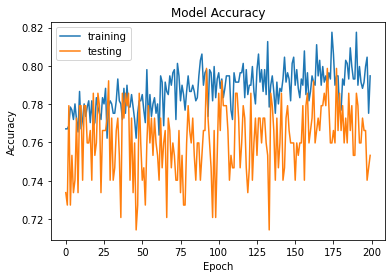

In [97]:
fig1 = plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["training","testing"], loc="upper left")

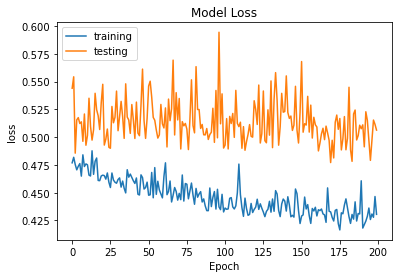

In [98]:
fig2 = plt.figure(2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["training","testing"], loc="upper left")
plt.show()

In [99]:
from keras.callbacks import ModelCheckpoint

In [100]:
filepath = "weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = "val_accuracy",verbose = 1, save_best_only = True, mode = "max")
callbacks_list = [checkpoint]

In [101]:
model.fit(x,y, validation_split = 0.2, epochs = 150, batch_size=10, callbacks=callbacks_list , verbose = 0)


Epoch 1: val_accuracy improved from -inf to 0.76623, saving model to weights.best.hdf5

Epoch 2: val_accuracy improved from 0.76623 to 0.77922, saving model to weights.best.hdf5

Epoch 3: val_accuracy did not improve from 0.77922

Epoch 4: val_accuracy did not improve from 0.77922

Epoch 5: val_accuracy did not improve from 0.77922

Epoch 6: val_accuracy did not improve from 0.77922

Epoch 7: val_accuracy did not improve from 0.77922

Epoch 8: val_accuracy did not improve from 0.77922

Epoch 9: val_accuracy did not improve from 0.77922

Epoch 10: val_accuracy did not improve from 0.77922

Epoch 11: val_accuracy did not improve from 0.77922

Epoch 12: val_accuracy did not improve from 0.77922

Epoch 13: val_accuracy did not improve from 0.77922

Epoch 14: val_accuracy did not improve from 0.77922

Epoch 15: val_accuracy did not improve from 0.77922

Epoch 16: val_accuracy did not improve from 0.77922

Epoch 17: val_accuracy did not improve from 0.77922

Epoch 18: val_accuracy did not i

In [102]:
# 20. Satırda durmak yeterlidir

# Normalize Data - Veri Ölçeklendirmesi

In [103]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df_1 = pd.read_csv("heightweight.csv")

In [104]:
df_1.head()

,gender,ageYear,ageMonth,HeightIn,WeightLB
0,f,11.91667,143,56.3,85.0
1,f,12.91667,155,62.3,105.0
2,f,12.75000,153,63.3,108.0
3,f,13.41667,161,59.0,92.0
4,f,15.91667,191,62.5,112.5


In [105]:
data = df_1[["WeightLB","ageYear"]]

In [106]:
data.head()

,WeightLB,ageYear
0,85.0,11.91667
1,105.0,12.91667
2,108.0,12.75000
3,92.0,13.41667
4,112.5,15.91667


In [107]:
from sklearn.preprocessing import normalize, scale
data_scaled = scale(data) #scale every column independently

In [108]:
data_scaled

array([[-0.840635  , -1.16552514],
       [ 0.19031193, -0.51288498],
       [ 0.34495397, -0.62166052],
       [-0.47980357, -0.1865649 ],
       [ 0.57691704,  1.4450355 ],
       [ 0.55114336,  0.35729973],
       [ 0.13876459,  1.11871542],
       [-1.66539255, -1.21991618],
       [-0.35093521, -0.24095593],
       [-1.69116622, -1.32868518],
       [ 0.13876459, -1.38307622],
       [ 0.11299091,  0.73800431],
       [ 1.14393785, -0.40411597],
       [-0.42825623, -0.83920506],
       [-2.61901847, -1.16552514],
       [-0.63444561, -1.05675613],
       [ 0.29340663,  1.4450355 ],
       [-1.17569276, -0.78482056],
       [ 0.7057854 , -0.9479806 ],
       [ 0.65423806,  0.84677985],
       [-0.840635  , -1.27430068],
       [-1.04682439, -1.32868518],
       [-0.91795602, -0.02340486],
       [ 0.55114336,  0.6292353 ],
       [-0.01587745,  1.11871542],
       [ 0.11299091,  0.08536415],
       [-0.40248255,  0.57484427],
       [ 0.55114336,  0.84677985],
       [ 1.99446907,

In [109]:
data_scaled.max()

4.65384528542972

In [110]:
data_scaled.min()

-2.6190184668329466

In [37]:
scale([110,20])

array([ 1., -1.])

In [117]:
scale([50,150,300])

array([-1.13554995, -0.16222142,  1.29777137])

In [38]:
data_normal = normalize(data)

In [39]:
data_normal

array([[0.99031506, 0.13883833],
       [0.99251835, 0.12209554],
       [0.99310345, 0.11724138],
       [0.98953298, 0.14430693],
       [0.99013928, 0.1400864 ],
       [0.99200295, 0.12621466],
       [0.98919069, 0.14663487],
       [0.98561093, 0.16902985],
       [0.99019251, 0.13970967],
       [0.98580427, 0.16789859],
       [0.99385457, 0.11069371],
       [0.98988564, 0.14186764],
       [0.99443538, 0.10534839],
       [0.99120461, 0.13233829],
       [0.97326951, 0.22966597],
       [0.99090905, 0.13453349],
       [0.98911643, 0.14713495],
       [0.98755811, 0.15725448],
       [0.99437439, 0.10592249],
       [0.9914543 , 0.13045451],
       [0.99058029, 0.13693316],
       [0.9897859 , 0.1425618 ],
       [0.98686887, 0.16152349],
       [0.99153446, 0.12984383],
       [0.98855016, 0.15089259],
       [0.99118604, 0.13247733],
       [0.98805398, 0.15410821],
       [0.99115044, 0.13274336],
       [0.99227788, 0.12403473],
       [0.9895506 , 0.14418605],
       [0.

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [42]:
scaled = scaler.fit_transform(data)

In [43]:
scaled

array([[0.28512397, 0.03603676],
       [0.45041322, 0.14414486],
       [0.47520661, 0.12612649],
       [0.34297521, 0.19819892],
       [0.51239669, 0.46846919],
       [0.50826446, 0.28828865],
       [0.44214876, 0.41441514],
       [0.15289256, 0.02702703],
       [0.36363636, 0.18918919],
       [0.14876033, 0.00900973],
       [0.44214876, 0.        ],
       [0.43801653, 0.35135135],
       [0.60330579, 0.16216216],
       [0.35123967, 0.09009081],
       [0.        , 0.03603676],
       [0.31818182, 0.05405405],
       [0.46694215, 0.46846919],
       [0.23140496, 0.09909946],
       [0.53305785, 0.07207243],
       [0.52479339, 0.36936973],
       [0.28512397, 0.01801838],
       [0.25206612, 0.00900973],
       [0.27272727, 0.22522595],
       [0.50826446, 0.33333405],
       [0.41735537, 0.41441514],
       [0.43801653, 0.24324324],
       [0.3553719 , 0.32432432],
       [0.50826446, 0.36936973],
       [0.73966942, 0.63964   ],
       [0.27272727, 0.06306378],
       [0.

# King County Home Price Prediction

In [44]:
#!pip install pickle5

In [45]:
#!pandas --version

In [46]:
import pickle5 as pickle
import pandas as pd

In [119]:
df_2 = pd.read_csv("kc_house.csv")

In [120]:
#!pip install --upgrade --user pandas

In [123]:
df_2.head()

,Unnamed: 0,age,sqft_living,sqft_living15,sqft_above,sqft_basement,grade,bathrooms,view,bedrooms,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,10637,107,10240000,2400,2650,302500,9,5.0625,0,81,...,0,0,0,0,0,0,0,0,0,0
1,2395,58,5475600,2340,2340,0,9,5.0625,0,256,...,0,0,0,0,0,0,0,0,0,0
2,10842,71,2560000,1950,1600,0,7,4.0000,0,16,...,0,0,0,0,0,0,0,0,0,0
3,8646,29,6051600,2410,2460,0,10,6.2500,0,81,...,0,0,0,0,0,0,0,0,0,0
4,15900,89,6300100,1820,1810,490000,8,5.0625,2,81,...,0,0,0,0,0,0,0,0,0,1


In [140]:
df_2.columns

Index(['Unnamed: 0', 'age', 'sqft_living', 'sqft_living15', 'sqft_above',
       'sqft_basement', 'grade', 'bathrooms', 'view', 'bedrooms', 'lat',
       'waterfront', 'condition', 'floors', 'waterfront.1', 'price',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092',
       'zipcode_98102', 'zipcode_9

In [124]:
x = df_2.drop("price", axis=1)

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [126]:
x = scaler.fit_transform(x)

In [128]:
y = df_2["price"]

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [141]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [142]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [143]:
model = Sequential()
model.add(Dense(85,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(27,activation="relu"))
model.add(Dense(19,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(3,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam",loss="mse")

In [144]:
model.fit(x = x_train, y = y_train, validation_data = (x_test,y_test),batch_size=128, epochs=250,verbose=1)

Epoch 1/250
106/106 [==============================] - 1s 3ms/step - loss: 225588903936.0000 - val_loss: 224382484480.0000
Epoch 2/250
106/106 [==============================] - 0s 3ms/step - loss: 219289370624.0000 - val_loss: 198104334336.0000
Epoch 3/250
106/106 [==============================] - 0s 3ms/step - loss: 109426753536.0000 - val_loss: 20551641088.0000
Epoch 4/250
106/106 [==============================] - 0s 2ms/step - loss: 18571237376.0000 - val_loss: 17070001152.0000
Epoch 5/250
106/106 [==============================] - 0s 2ms/step - loss: 16457437184.0000 - val_loss: 15332893696.0000
Epoch 6/250
106/106 [==============================] - 0s 2ms/step - loss: 14875927552.0000 - val_loss: 13881298944.0000
Epoch 7/250
106/106 [==============================] - 0s 2ms/step - loss: 13510908928.0000 - val_loss: 12611415040.0000
Epoch 8/250
106/106 [==============================] - 0s 2ms/step - loss: 12318582784.0000 - val_loss: 11507313664.0000
Epoch 9/250
106/106 [======

106/106 [==============================] - 0s 3ms/step - loss: 5921212928.0000 - val_loss: 5648659968.0000
Epoch 70/250
106/106 [==============================] - 0s 3ms/step - loss: 5928949760.0000 - val_loss: 5629620736.0000
Epoch 71/250
106/106 [==============================] - 0s 3ms/step - loss: 5915681792.0000 - val_loss: 5634376704.0000
Epoch 72/250
106/106 [==============================] - 0s 3ms/step - loss: 5906592768.0000 - val_loss: 5632285696.0000
Epoch 73/250
106/106 [==============================] - 0s 3ms/step - loss: 5897232384.0000 - val_loss: 5614258688.0000
Epoch 74/250
106/106 [==============================] - 0s 3ms/step - loss: 5897325568.0000 - val_loss: 5613575680.0000
Epoch 75/250
106/106 [==============================] - 0s 3ms/step - loss: 5883026432.0000 - val_loss: 5597096448.0000
Epoch 76/250
106/106 [==============================] - 0s 3ms/step - loss: 5890995200.0000 - val_loss: 5597403136.0000
Epoch 77/250
106/106 [==============================]

106/106 [==============================] - 0s 3ms/step - loss: 5674477056.0000 - val_loss: 5407392256.0000
Epoch 138/250
106/106 [==============================] - 0s 2ms/step - loss: 5669441536.0000 - val_loss: 5389892608.0000
Epoch 139/250
106/106 [==============================] - 0s 3ms/step - loss: 5671473152.0000 - val_loss: 5391129600.0000
Epoch 140/250
106/106 [==============================] - 0s 3ms/step - loss: 5665583616.0000 - val_loss: 5386850816.0000
Epoch 141/250
106/106 [==============================] - 0s 3ms/step - loss: 5662987776.0000 - val_loss: 5386495488.0000
Epoch 142/250
106/106 [==============================] - 0s 3ms/step - loss: 5667234304.0000 - val_loss: 5383572992.0000
Epoch 143/250
106/106 [==============================] - 0s 3ms/step - loss: 5693606912.0000 - val_loss: 5386776064.0000
Epoch 144/250
106/106 [==============================] - 0s 3ms/step - loss: 5662163968.0000 - val_loss: 5384110080.0000
Epoch 145/250
106/106 [=======================

Epoch 205/250
106/106 [==============================] - 1s 6ms/step - loss: 5572263936.0000 - val_loss: 5303986688.0000
Epoch 206/250
106/106 [==============================] - 1s 6ms/step - loss: 5559860224.0000 - val_loss: 5303890944.0000
Epoch 207/250
106/106 [==============================] - 1s 5ms/step - loss: 5561954304.0000 - val_loss: 5292704256.0000
Epoch 208/250
106/106 [==============================] - 1s 6ms/step - loss: 5576400896.0000 - val_loss: 5321513984.0000
Epoch 209/250
106/106 [==============================] - 1s 6ms/step - loss: 5559996928.0000 - val_loss: 5300419584.0000
Epoch 210/250
106/106 [==============================] - 1s 6ms/step - loss: 5560354816.0000 - val_loss: 5299267584.0000
Epoch 211/250
106/106 [==============================] - 1s 6ms/step - loss: 5557868032.0000 - val_loss: 5292277248.0000
Epoch 212/250
106/106 [==============================] - 1s 6ms/step - loss: 5560161792.0000 - val_loss: 5296878080.0000
Epoch 213/250
106/106 [=========

In [145]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 85)                7225      
                                                                 
 dense_29 (Dense)            (None, 40)                3440      
                                                                 
 dense_30 (Dense)            (None, 27)                1107      
                                                                 
 dense_31 (Dense)            (None, 19)                532       
                                                                 
 dense_32 (Dense)            (None, 5)                 100       
                                                                 
 dense_33 (Dense)            (None, 3)                 18        
                                                                 
 dense_34 (Dense)            (None, 1)                

In [146]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:>

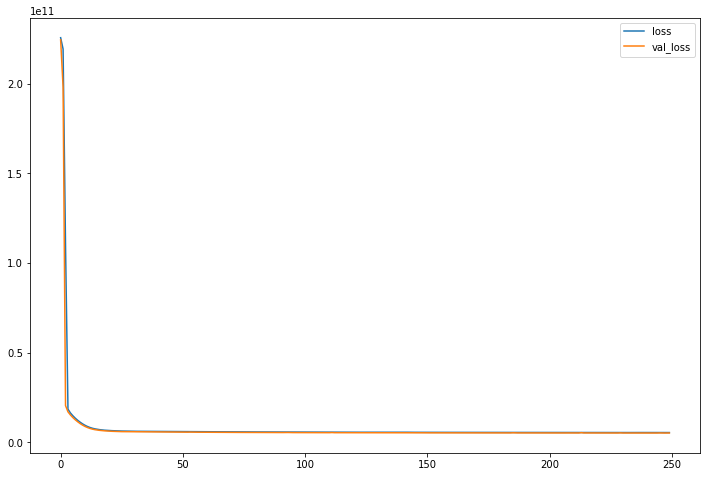

In [147]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [148]:
pred = model.predict(x_test)

106/106 [==============================] - 0s 2ms/step


In [149]:
(mean_squared_error(y_test,pred))**0.5

72623.6866159431

In [150]:
r2_score(y_test,pred)

0.8313528542370419